In [ ]:
!echo "deb http://downloads.skewed.de/apt focal main" >> /etc/apt/sources.list
!apt-key adv --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool #python3-matplotlib python3-cair

!git clone https://github.com/niquepolice/bigchallenges.git
!cp -r bigchallenges/* .xx


Executing: /tmp/apt-key-gpghome.nPiS5wEUiW/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
gpg: key 612DEFB798507F25: public key "Tiago de Paula Peixoto <tiago@skewed.de>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ Packages [82.8 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:7 http://downloads.skewed.de/apt focal InRelease [7,536 B]
Get:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:9 http://downloads.skewed.de/apt focal/main amd64 Packages [5,009 B]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu 

In [ ]:
!git clone https://github.com/krammnic/GpuBellman.git

fatal: destination path 'GpuBellman' already exists and is not an empty directory.


In [ ]:
!sudo add-apt-repository ppa:ubuntu-toolchain-r/test # Ignore if not ubuntu

!sudo apt-get update

!sudo apt-get install gcc-4.9

!sudo apt-get upgrade libstdc++6

!sudo apt update
!sudo apt install libc6



 Toolchain test builds; see https://wiki.ubuntu.com/ToolChain

 More info: https://launchpad.net/~ubuntu-toolchain-r/+archive/ubuntu/test
Press [ENTER] to continue or Ctrl-c to cancel adding it.




Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:6 http://downloads.skewed.de/apt focal InRelease
Hit:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/ubuntu-toolch

In [ ]:
!sudo apt install glibc-source

Reading package lists... Done
Building dependency tree       
Reading state information... Done
glibc-source is already the newest version (2.31-0ubuntu9.9).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [ ]:
# Benchmark GPU Bellman

# Run the fastest version
!sudo /content/GpuBellman/build/build/bellman cuda-v3 /content/GpuBellman/input/USA-road-d.COL.gr 196 1024 0

# We have run this executable on RTX 3070 videocard. Elapsed time: **5566.06 milli seconds**

In [ ]:
from graph_tool import generation, topology, Graph
import pandas as pd
import numpy as np

In [ ]:
# Benchmark graph-tool dijkstra

graph_array = []

verteces_from = list(map(int, open('/content/GpuBellman/input/USA-road-d.COL.gr_FROM.csv', 'r').read().split(',')))
verteces_to = list(map(int, open('/content/GpuBellman/input/USA-road-d.COL.gr_TO.csv', 'r').read().split(',')))
weight = list(map(int, open('/content/GpuBellman/input/USA-road-d.COL.gr_W.csv', 'r').read().split(',')))
vertices = list(map(int, open('/content/GpuBellman/input/USA-road-d.COL.gr_V.csv', 'r').read().split(',')))

In [ ]:

edges = list(zip(verteces_from, verteces_to))
print(len(edges))
print(len(vertices))
for i in range(len(weight)):
  edges[i] += (weight[i],)
print(edges[0])

graph = Graph(edges, eprops=[("weight", "double")])



1057066
435666
(1, 2, 12406)


UsageError: Line magic function `%%time` not found.


In [ ]:
%%time
print(list(topology.shortest_distance(graph, source=0, pred_map=True)[0].a)[1])

2147483647
CPU times: user 74.9 ms, sys: 6.83 ms, total: 81.7 ms
Wall time: 82.3 ms


<BarContainer object of 2 artists>

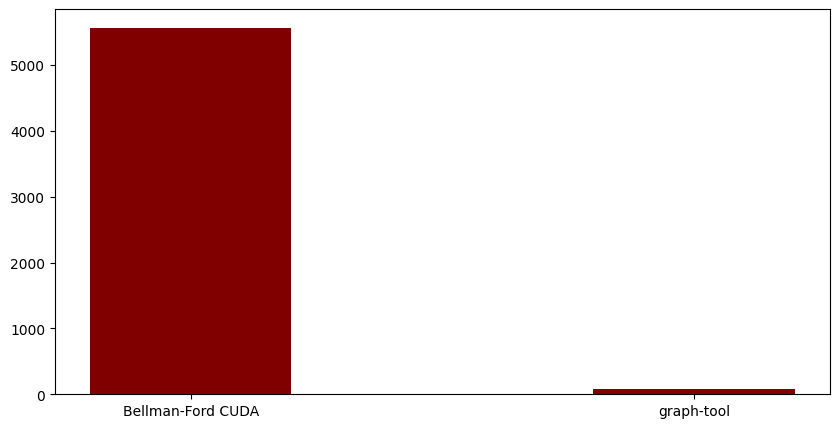

In [ ]:
import matplotlib.pyplot as plt

data = {'Bellman-Ford CUDA': 5566, 'graph-tool': 82}
name = list(data.keys())
time = list(data.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(name, time, color ='maroon' ,width = 0.4)
